In [9]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import IPython.display as ipd

from scipy.ndimage.filters import maximum_filter
from scipy.ndimage.morphology import (generate_binary_structure,
                                      binary_erosion)
from scipy.ndimage.morphology import iterate_structure


sampling_rate = 22050

# Load and Plot Audio Samples

In [106]:
savedData = []
def plot_audio_sample(sample):    
     data, sr = librosa.load(sample)
     savedData.append(data)
     librosa.display.waveshow(data, sr=sr)

In [107]:
A = []
pathAudio = "Audio/"
files = librosa.util.find_files(pathAudio, ext=['wav']) 
files = np.asarray(files)
for x in files:
    A.append(x)    

In [108]:
plot_audio_sample(A[0])

IndexError: list index out of range

In [5]:
plot_audio_sample(A[1])

IndexError: list index out of range

In [6]:
plot_audio_sample(A[2])

IndexError: list index out of range

In [7]:
plot_audio_sample(A[3])

IndexError: list index out of range

In [8]:
plot_audio_sample(A[4])

IndexError: list index out of range

# Computing STFT  + Picking & Plotting Peaks


# Song 1 STFT

In [9]:
specgram, freqs, times = mlab.specgram(savedData[0], NFFT=4096, Fs=sampling_rate, noverlap=int(4096 / 2))
specgram[specgram == 0] = 1e-6

IndexError: list index out of range

In [10]:
fig1 = plt.figure(figsize=(10, 10), facecolor='white')
extent = 0, np.amax(times), freqs[0], freqs[-1] #data coord of bounding box

Z = 10.0 * np.log10(specgram)
Z = np.flipud(Z)

plt.imshow(Z, cmap='inferno', extent=extent)
plt.xlabel('Time bin')
plt.ylabel('Frequency [Hz]')
plt.title('Audio STFT Plot of Song 1')
plt.axis('auto')

ax = plt.gca() #get current axes
ax.set_xlim([0, extent[1]])
ax.set_ylim([freqs[0], freqs[-1]])

plt.show()

Z.shape

NameError: name 'times' is not defined

<Figure size 720x720 with 0 Axes>

# Peak 1

In [ ]:
# Get 90% cutoff threshold
def find_90_C_k(spec_gram):
    spec_gram = spec_gram[spec_gram != 0] #remove 0's
    specgram_flattened = spec_gram.flatten() #returns copy of orig
    specgram_sorted = np.sort(np.log(np.abs(specgram_flattened)))
    specgram_length = len(specgram_sorted)
    
    ninety_index = int(0.9 * specgram_length)
    ninety_C_k = specgram_sorted[ninety_index]
    return ninety_C_k

In [ ]:
def spectogram_to_peaks(specgram, freqs, times):
    fp = generate_binary_structure(2, 1)
    fp = iterate_structure(fp, 20)
    background_threshold = find_90_C_k(specgram)
    peaks = ((specgram == maximum_filter(specgram, footprint = fp)) & (specgram > background_threshold))

In [ ]:
peaks_array = spectogram_to_peaks(specgram, freqs, times)
peaks_where = np.where(peaks_array)
y_freq = peaks_where[0]
x_frame = peaks_where[1]

In [ ]:
fig2 = plt.figure(figsize=(10, 10), facecolour='white')
plt.scatter(x_frame, y_freq, marker='x', colour='black')
plt.show()

# Song 2 STFT

In [98]:
specgram, freqs, times = mlab.specgram(savedData[1], NFFT=4096, Fs=sampling_rate, noverlap=int(4096 / 2))
specgram[specgram == 0] = 1e-6

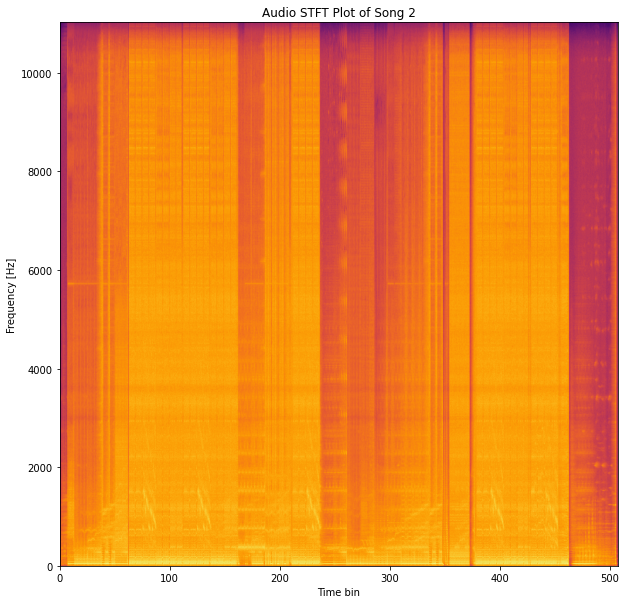

(2049, 5458)

In [99]:
fig1 = plt.figure(figsize=(10, 10), facecolor='white')
extent = 0, np.amax(times), freqs[0], freqs[-1] #data coord of bounding box

Z = 10.0 * np.log10(specgram)
Z = np.flipud(Z)

plt.imshow(Z, cmap='inferno', extent=extent)
plt.xlabel('Time bin')
plt.ylabel('Frequency [Hz]')
plt.title('Audio STFT Plot of Song 2')
plt.axis('auto')

ax = plt.gca() #get current axes
ax.set_xlim([0, extent[1]])
ax.set_ylim([freqs[0], freqs[-1]])

plt.show()

Z.shape

# Song 3 STFT

In [100]:
specgram, freqs, times = mlab.specgram(savedData[2], NFFT=4096, Fs=sampling_rate, noverlap=int(4096 / 2))
specgram[specgram == 0] = 1e-6

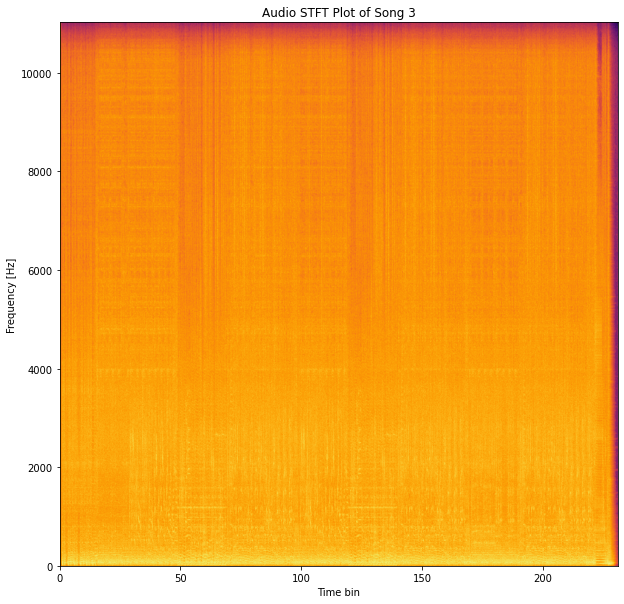

(2049, 2487)

In [101]:
fig1 = plt.figure(figsize=(10, 10), facecolor='white')
extent = 0, np.amax(times), freqs[0], freqs[-1] #data coord of bounding box

Z = 10.0 * np.log10(specgram)
Z = np.flipud(Z)

plt.imshow(Z, cmap='inferno', extent=extent)
plt.xlabel('Time bin')
plt.ylabel('Frequency [Hz]')
plt.title('Audio STFT Plot of Song 3')
plt.axis('auto')

ax = plt.gca() #get current axes
ax.set_xlim([0, extent[1]])
ax.set_ylim([freqs[0], freqs[-1]])

plt.show()

Z.shape

# Song 4 STFT


In [102]:
specgram, freqs, times = mlab.specgram(savedData[3], NFFT=4096, Fs=sampling_rate, noverlap=int(4096 / 2))
specgram[specgram == 0] = 1e-6

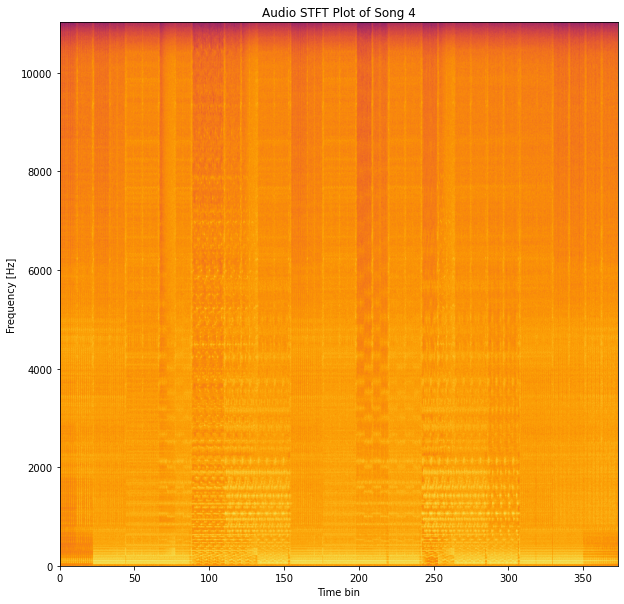

(2049, 4016)

In [103]:
fig1 = plt.figure(figsize=(10, 10), facecolor='white')
extent = 0, np.amax(times), freqs[0], freqs[-1] #data coord of bounding box

Z = 10.0 * np.log10(specgram)
Z = np.flipud(Z)

plt.imshow(Z, cmap='inferno', extent=extent)
plt.xlabel('Time bin')
plt.ylabel('Frequency [Hz]')
plt.title('Audio STFT Plot of Song 4')
plt.axis('auto')

ax = plt.gca() #get current axes
ax.set_xlim([0, extent[1]])
ax.set_ylim([freqs[0], freqs[-1]])

plt.show()

Z.shape

# Song 5 STFT

In [104]:
specgram, freqs, times = mlab.specgram(savedData[4], NFFT=4096, Fs=sampling_rate, noverlap=int(4096 / 2))
specgram[specgram == 0] = 1e-6

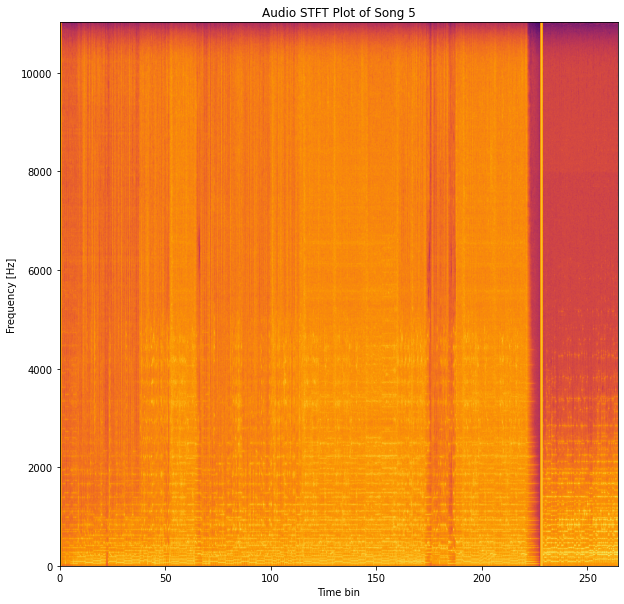

(2049, 2846)

In [105]:
fig1 = plt.figure(figsize=(10, 10), facecolor='white')
extent = 0, np.amax(times), freqs[0], freqs[-1] #data coord of bounding box

Z = 10.0 * np.log10(specgram)
Z = np.flipud(Z)

plt.imshow(Z, cmap='inferno', extent=extent)
plt.xlabel('Time bin')
plt.ylabel('Frequency [Hz]')
plt.title('Audio STFT Plot of Song 5')
plt.axis('auto')

ax = plt.gca() #get current axes
ax.set_xlim([0, extent[1]])
ax.set_ylim([freqs[0], freqs[-1]])

plt.show()

Z.shape